In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time

In [2]:
import pandas as pd
from pprint import pprint
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Okt
import nltk

In [3]:
def getreview(url):
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


    # 트립닷컴 접속하기
    driver.get(url)


    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')

    textlst=[]
    maxpage=driver.find_elements(By.CSS_SELECTOR,"#reviews > li:nth-child(1) > div > div:nth-child(3) > div.ReviewListContainer-wnuo1c-0 > div > div > div > div > ul > li:nth-child(6)")
    print(maxpage[0].text)
    for page in range(1,int(maxpage[0].text)): 
        for i in range(1,6):
            a=driver.find_elements(By.CSS_SELECTOR,"#reviews > li:nth-child(1) > div > div:nth-child(3) > div.ReviewListContainer-wnuo1c-0 > div > ul > div:nth-child({}) > li > div.gl-poi-detail_comment-content > div:nth-child(2) > a > p".format(i))
            try:
                textlst.append(a[0].text)
            except:
                textlst.append("")
                print("no text")
        nextbutton=driver.find_element(By.CSS_SELECTOR,"#reviews > li:nth-child(1) > div > div:nth-child(3) > div.ReviewListContainer-wnuo1c-0 > div > div > div > div > button.btn-next")
        nextbutton.send_keys(Keys.ENTER)
        time.sleep(1)
    placename=driver.find_elements(By.CSS_SELECTOR,"#poi\.detail\.overview > li > div > div.top-box > div.top-box-left > div.poi-page-title > h1")
    return textlst,placename[0].text

In [4]:
#selector가 일관되어 있지 않아서 밑의 정의로 수정했습니다

In [9]:
def getreview2(url):
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))


    # 트립닷컴 접속하기
    driver.get(url)


    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')

    textlst=[]

    maxpage=driver.find_elements(By.CSS_SELECTOR,"div.ReviewListContainer-wnuo1c-0 > div > div > div > div > ul > li:nth-child(6)")
    print(maxpage[0].text)
    for page in range(1,int(maxpage[0].text)): 
        for i in range(1,6):
            a=driver.find_elements(By.CSS_SELECTOR,"div.ReviewListContainer-wnuo1c-0 > div > ul > div:nth-child({}) > li > div.gl-poi-detail_comment-content > div:nth-child(2) > a > p".format(i))
            try:
                textlst.append(a[0].text)
            except:
                textlst.append("")
                print("no text")
        nextbutton=driver.find_element(By.CSS_SELECTOR,'div.ReviewListContainer-wnuo1c-0 > div > div > div > div > button.btn-next')
        nextbutton.send_keys(Keys.ENTER)
        time.sleep(1)

    placename=driver.find_elements(By.CSS_SELECTOR," #poi\.detail\.overview > div > div.TopBoxStyle-sc-2jpvue-4.cKCoNt > div.top-left > div.top-box > div > div.poi-page-title > h1")
    return textlst,placename[0].text

In [6]:
#example!

In [10]:
textlst,placename=getreview2("https://kr.trip.com/travel-guide/attraction/tokyo/tokyo-disneysea-10521877/?rankingId=100000001060&locale=ko_kr")

100
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text


In [11]:
#initial setting
df=pd.DataFrame()
placelst=[]
totalreview=[]

In [12]:
textlst

['도쿄의 매력은 디즈니이겠죠! 2019년 1월은 디즈니랜드,12월은 디즈니시로 마무리하며~2020년은 디즈니시처럼 활기차고 멋진 한해 되길 바랍니다.',
 '확실히 느낀거지만 한국에 있는 놀이동산과 차원이 달랐어요! 퀄리티도 그렇구 크기도 그렇구 ㅎㅎㅎ 여자친구가 같이 가고 싶어 해서 갔는데 굉장히 만족스럽습니다. 그 날 날씨가 흐려서 그래도 좀 나았지만 다리는 아프네요 ㅎㅎㅎㅎ 놀이기구가 한국에 있는 것에 비하면 아무래도 스릴감은 떨어질 수 있지만 퀄리티는 훨씬 좋네요 ㅎㅎㅎ^^ 특히 인디아나존스는 한 번 꼭 타보시길 강추드립니다! (패스트패스 되는 거 중에는 토이스토리랑 인투더어스 빼곤 다 탔네요 ㅎㅎ)',
 '도쿄 오션 디즈니 파크, 타피 곰과 셰리 메이의 테마 파크를 주축으로! 도쿄 상하이 디즈니에서만 볼 수있는 타피 패밀리 공연과 특별 공원! 좋아하는 친구들은 ～～ 밤에 바다에 가야한다. 불꽃 놀이 쇼가있다. 정말 아름답다! (그러나 겨울에는 너무 오랫동안 바람이 불면 두통이 발생할 수 있습니다. ～ 공원에서 귀여운 모자를 구입할 수 있습니다. 🤣)',
 '아이들은 놀고 행복합니다. 작은 동물은 기본적으로 비슷하지만 모든 장소의 공연은 항상 놀랍습니다.',
 '도쿄 디즈니랜드옆에 있는 디즈니씨이다.랜드와는 다른 색다른 경험을 하러 가보자',
 '코로나 화재로 디즈니는 사람도 많지 않고 대기 시간도 좋지 않기 때문에 매우 좋았다!소아린에서 세계 여행 한 기분이되었습니다 😊😊',
 '디즈니에 도착했을 때, 나이 제한이 없었고, 성인은 아이들을 바꾸고, 손을 잡고, 함께 걷고, 함께 놀고, 먹고 마시고 무적이었습니다! 부드러운 다리를 가지고 놀고, 부드러운 손을 사서, 내 체력을 비난하십시오! 저녁의 압축은 행복한 플로트 퍼레이드입니다!',
 '디즈니가 이틀 동안 머무를 것이기 때문에 도쿄에 오는 데 더 많은 시간을 남겨야합니다. 바다는 놓칠 수 없으며, 더 많은 다른 경험이 너무 훌륭합니다.',
 '한번 꼭 와야해요. 카드가 좀 비싸겠지만 그만한 가치가

In [13]:
placename

'도쿄 디즈니시'

In [14]:
tottext=""
for i in range(len(textlst)):
    tottext+=textlst[i]

In [15]:
#데이터 프레임에 저장

In [16]:
placelst.append(placename)
totalreview.append(tottext)
df['place']=placelst
df['review']=totalreview

In [17]:
import nltk
from nltk import word_tokenize


In [18]:
textlst[1]

'확실히 느낀거지만 한국에 있는 놀이동산과 차원이 달랐어요! 퀄리티도 그렇구 크기도 그렇구 ㅎㅎㅎ 여자친구가 같이 가고 싶어 해서 갔는데 굉장히 만족스럽습니다. 그 날 날씨가 흐려서 그래도 좀 나았지만 다리는 아프네요 ㅎㅎㅎㅎ 놀이기구가 한국에 있는 것에 비하면 아무래도 스릴감은 떨어질 수 있지만 퀄리티는 훨씬 좋네요 ㅎㅎㅎ^^ 특히 인디아나존스는 한 번 꼭 타보시길 강추드립니다! (패스트패스 되는 거 중에는 토이스토리랑 인투더어스 빼곤 다 탔네요 ㅎㅎ)'

In [19]:
#형태소 분석(2가지 방법+ okt사용)

In [20]:
hannanum=Hannanum()
print(hannanum.morphs(textlst[1]))

['확실히', '느낀거', '이', '지만', '한국', '에', '있', '는', '놀이동산', '과', '차원', '이', '다르', '아아', '요', '!', '퀄리티', '도', '그렇구', '크', '기', '도', '그렇구', 'ㅎㅎㅎ', '여자친구', '가', '같', '이', '가', '고', '싶', '어', '하', '어서', '가', '아ㄴ데', '굉장히', '만족', '스럽', '습니다', '.', '그', '나', 'ㄹ', '날씨', '가', '흐리', '어서', '그래도', '좀', '나', '아지만', '다리', '는', '아프', '네', '요', 'ㅎㅎㅎㅎ', '놀이기구', '가', '한국', '에', '있', '는', '것', '에', '비하', '면', '아무렇', '어도', '스릴감', '은', '떨', '어', '지', 'ㄹ', '수', '있', '지', '말', 'ㄴ', '퀄리티', '는', '훨씬', '좋', '네', '요', 'ㅎㅎㅎ^^', '특히', '인디아나존스', '는', '하', 'ㄴ', '번', '꼭', '타', '보시길', '강추드립니', '이', '다', '!', '(', '패스트패스', '되', '는', '것', '중', '에는', '토이스토리랑', '인투더어스', '빼', '곤', '다', '트', '었네', '요', 'ㅎㅎ', ')']


In [21]:
kkma = Kkma()
print(kkma.morphs(textlst[1]))

['확실히', '느끼', 'ㄴ', '거지', '만', '한국', '에', '있', '는', '놀이', '동산', '과', '차원', '이', '다르', '았', '어요', '!', '퀄리티', '도', '그렇', '구', '크기', '도', '그렇', '구', 'ㅎㅎㅎ', '여자', '친구', '가', '같이', '가', '고', '싶', '어', '하', '어서', '가', '었', '는데', '굉장히', '만족', '스럽', '습니다', '.', '그', '날', '날씨', '가', '흐리', '어서', '그리하', '여도', '좀', '낫', '았', '지만', '다리', '는', '아프', '네요', 'ㅎㅎㅎㅎ', '놀이', '기구', '가', '한국', '에', '있', '는', '것', '에', '비하', '면', '아무래도', '스릴', '감', '은', '떨어지', 'ㄹ', '수', '있', '지만', '퀄리티', '는', '훨씬', '좋', '네요', 'ㅎㅎㅎ', '^^', '특히', '인디아', '나', '존', '슬', '는', '한', '번', '꼭', '타', '아', '보시', '길', '강추', '드리', 'ㅂ니다', '!', '(', '패스트', '패스', '되', '는', '거', '중', '에', '는', '토이', '스토리', '랑', '인', '투', '더', '어스', '빼', '곤', '다', '타', '었', '네요', 'ㅎㅎ', ')']


In [23]:
okt=Okt()
print(okt.morphs(textlst[1]))

['확실히', '느낀거지만', '한국', '에', '있는', '놀이동산', '과', '차원', '이', '달랐어요', '!', '퀄리티', '도', '그렇구', '크기', '도', '그렇구', 'ㅎㅎㅎ', '여자친구', '가', '같이', '가고', '싶어', '해서', '갔는데', '굉장히', '만족스럽습니다', '.', '그', '날', '날씨', '가', '흐려서', '그래도', '좀', '나았지만', '다리는', '아프네요', 'ㅎㅎㅎㅎ', '놀이기구', '가', '한국', '에', '있는', '것', '에', '비', '하면', '아무래도', '스릴', '감은', '떨어질', '수', '있지만', '퀄리티', '는', '훨씬', '좋네요', 'ㅎㅎㅎ', '^^', '특히', '인디아나', '존스', '는', '한', '번', '꼭', '타', '보시', '길', '강추', '드립니다', '!', '(', '패스트', '패스', '되는', '거', '중', '에는', '토이스토리', '랑', '인투더', '어스', '빼곤', '다', '탔네요', 'ㅎㅎ', ')']


In [17]:
#명사 분석

In [18]:
print(hannanum.nouns(textlst[1]))

['느낀거', '한국', '놀이동산', '차원', '퀄리티', '그렇구', '그렇구', 'ㅎㅎㅎ', '여자친구', '만족', '날씨', '다리', 'ㅎㅎㅎㅎ', '놀이기구', '한국', '것', '스릴감', '수', '퀄리티', 'ㅎㅎㅎ^^', '인디아나존스', '번', '보시길', '강추드립니', '패스트패스', '것', '중', '토이스토리랑', '인투더어스', 'ㅎㅎ']


In [19]:
print(kkma.nouns(textlst[1]))

['거지', '한국', '놀이', '놀이동산', '동산', '차원', '퀄리티', '크기', '여자', '여자친구', '친구', '만족', '날', '날씨', '다리', '놀이기구', '기구', '스릴', '스릴감', '감', '수', '인디아', '존', '번', '보시', '보시길', '길', '강추', '패스트', '패스트패스', '패스', '거', '중', '토이', '토이스토리', '스토리', '인', '인투', '투', '어스']


In [20]:
okt=Okt()
token_ko = okt.morphs(df['review'][0])

all_token = nltk.Text(token_ko)
print('전체 토큰의 수:', len(all_token.tokens))
print('중복 제외한 전체 토큰의 수:', len(set(all_token.tokens)))

전체 토큰의 수: 30340
중복 제외한 전체 토큰의 수: 3439


In [21]:
all_token.vocab().most_common(500)

[('.', 1794),
 (',', 862),
 ('는', 664),
 ('을', 655),
 ('의', 639),
 ('디즈니', 609),
 ('에', 593),
 ('이', 577),
 ('은', 569),
 ('를', 467),
 ('있습니다', 437),
 ('가', 422),
 ('것', 299),
 ('매우', 296),
 ('수', 294),
 ('!', 269),
 ('들', 260),
 ('프로젝트', 254),
 ('입니다', 213),
 ('도쿄', 208),
 ('적', 192),
 ('에서', 191),
 ('할', 186),
 ('공원', 183),
 ('랜드', 182),
 ('오션', 182),
 ('많은', 175),
 ('으로', 168),
 ('합니다', 166),
 ('와', 161),
 ('사람', 149),
 ('한', 148),
 ('시간', 145),
 ('과', 143),
 ('나', 139),
 ('에는', 128),
 ('더', 128),
 ('바다', 120),
 ('있으며', 109),
 ('있는', 107),
 ('테마', 95),
 ('흥미', 95),
 ('파크', 92),
 ('로', 89),
 ('보다', 89),
 ('하고', 88),
 ('세계', 87),
 ('티켓', 86),
 ('놀이', 81),
 ('하는', 81),
 ('때', 79),
 ('동안', 79),
 ('좋습니다', 79),
 ('너무', 78),
 ('재미', 77),
 ('인', 77),
 ('해양', 75),
 ('2', 75),
 ('(', 73),
 ('가치', 73),
 ('에게', 72),
 ('공연', 71),
 ('도', 69),
 ('아이', 68),
 ('않습니다', 68),
 ('가지', 64),
 ('여전히', 64),
 ('게임', 63),
 (']', 62),
 ('다른', 61),
 ('모든', 61),
 ('빠른', 61),
 ('FP', 61),
 ('열', 60),
 ('다', 59),
 

In [22]:
#한국어 불용어 리스트 활용

In [23]:
sw_txt = open('stopwordsko.txt', 'r', encoding='utf-8')

sw_list = []

for line in sw_txt.readlines():
    sw_list.append(line[:-1])

sw_txt.close()

In [24]:
token_ko = [each_word for each_word in token_ko if each_word not in sw_list]
all_token = nltk.Text(token_ko)
all_token.vocab().most_common(500)

[('.', 1794),
 (',', 862),
 ('는', 664),
 ('디즈니', 609),
 ('은', 569),
 ('있습니다', 437),
 ('매우', 296),
 ('수', 294),
 ('!', 269),
 ('프로젝트', 254),
 ('입니다', 213),
 ('도쿄', 208),
 ('적', 192),
 ('할', 186),
 ('공원', 183),
 ('랜드', 182),
 ('오션', 182),
 ('많은', 175),
 ('합니다', 166),
 ('사람', 149),
 ('한', 148),
 ('에는', 128),
 ('더', 128),
 ('바다', 120),
 ('있으며', 109),
 ('있는', 107),
 ('테마', 95),
 ('흥미', 95),
 ('파크', 92),
 ('보다', 89),
 ('하고', 88),
 ('세계', 87),
 ('티켓', 86),
 ('놀이', 81),
 ('하는', 81),
 ('좋습니다', 79),
 ('너무', 78),
 ('재미', 77),
 ('인', 77),
 ('해양', 75),
 ('2', 75),
 ('(', 73),
 ('가치', 73),
 ('공연', 71),
 ('도', 69),
 ('않습니다', 68),
 ('가지', 64),
 ('게임', 63),
 (']', 62),
 ('모든', 61),
 ('빠른', 61),
 ('FP', 61),
 ('열', 60),
 ('다', 59),
 ('일본', 58),
 ('대기', 57),
 ('좋은', 56),
 ('[', 56),
 (')', 54),
 ('했습니다', 54),
 ('두', 54),
 ('개', 54),
 ('아주', 53),
 ('그것', 53),
 ('이며', 52),
 ('가장', 51),
 ('줄', 51),
 ('고', 50),
 ('만', 50),
 ('때문', 49),
 ('없습니다', 49),
 ('인기', 48),
 ('분', 48),
 ('놀이기구', 47),
 ('번', 47),
 ('적합합

In [25]:
#1차 불용어 제거 버전에서 임의로 추가(예시를 기반으로 stopsecondlst 생성)
stopsecondlst=['도','위해','때문','두',')',""'바다','티켓','역','가치','FP','모든','다','일본','열','[','했습니다','개','그것','아주','이며','고','만','가장','없습니다','번','특히','합니다','사람','한','에는','더','있는','있으며','보다','하고','하는','너무','인','2','(',"않습니다",'는','디즈니','은','있습니다','매우','수','!','프로젝트','입니다','도쿄','적','할','.',',',']','하지','분','있고','3','상하이','대','가져','해야','시설','곳','사용','롭습니','"','기','하십시오','점프','유일한','1','내','됩니다','후','야합니다','선택','지역','4','코드',':','있지만','가야','스토리','여행','방문','같은','진진','갈','호텔','고대','생각','다시','팝콘','땅','하여','카드','재생','미국','번째','수상','7','QR','비교','하면','기본','장소','문','가격','날','비','없으며','진행',"있다고",'인쇄','전','필요','된','가고']
token_ko = [each_word for each_word in token_ko if each_word not in stopsecondlst]
all_token = nltk.Text(token_ko)
all_token.vocab().most_common(100)

[('공원', 183),
 ('랜드', 182),
 ('오션', 182),
 ('많은', 175),
 ('테마', 95),
 ('흥미', 95),
 ('파크', 92),
 ('세계', 87),
 ('놀이', 81),
 ('좋습니다', 79),
 ('재미', 77),
 ('해양', 75),
 ('공연', 71),
 ('가지', 64),
 ('게임', 63),
 ('빠른', 61),
 ('대기', 57),
 ('좋은', 56),
 ('줄', 51),
 ('인기', 48),
 ('놀이기구', 47),
 ('적합합니다', 47),
 ('하루', 46),
 ('정말', 45),
 ('쇼', 45),
 ('밤', 45),
 ('성인', 44),
 ('볼', 44),
 ('구입', 44),
 ('경험', 43),
 ('기계', 43),
 ('불꽃', 43),
 ('큰', 42),
 ('어린이', 40),
 ('연주', 40),
 ('패스', 38),
 ('다양한', 33),
 ('좋으며', 30),
 ('서비스', 30),
 ('물', 30),
 ('직접', 30),
 ('친구', 29),
 ('토이', 29),
 ('해적', 29),
 ('분위기', 28),
 ('모험', 27),
 ('레스토랑', 27),
 ('사진', 26),
 ('작은', 26),
 ('풍경', 26),
 ('말', 25),
 ('경치', 24),
 ('아름답습니다', 24),
 ('충격', 23),
 ('인어', 22),
 ('직원', 22),
 ('주로', 21),
 ('놀', 21),
 ('여름', 21),
 ('스타일', 21),
 ('서서', 21),
 ('스릴', 20),
 ('퍼레이드', 20),
 ('잘', 20),
 ('타워', 20),
 ('이해', 20),
 ('보트', 20),
 ('아침', 20),
 ('지어', 20),
 ('먼저', 19),
 ('내부', 19),
 ('지도', 19),
 ('지구', 19),
 ('실제', 19),
 ('성', 19),
 ('이야기', 1

In [26]:
df

,place,review
0,도쿄 디즈니시,"도쿄의 매력은 디즈니이겠죠! 2019년 1월은 디즈니랜드,12월은 디즈니시로 마무리..."


In [27]:
#based on the first example, make df with many places
# 일본의 관광명소 50곳의 리뷰데이터를 순차적으로 크롤링

In [36]:
urlinfo="""https://kr.trip.com/travel-guide/attraction/tokyo/tokyo-disneysea-10521877/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/tokyo-tower-78880/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/senso-ji-78892/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/ginza-10558711/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/tokyo-skytree-91422/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/ghibli-museum-88070/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/ueno-koen-78941/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/akihabara-10572510/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/sanrio-puroland-10759099/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/tokyo/shinjuku-10558900/?rankingId=100000001060
https://kr.trip.com/travel-guide/attraction/osaka/universal-studios-japan-81012/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/osaka-aquarium-kaiyukan-85082/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/shinsaibashi-10524206/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/dotombori-10558946/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/osaka-castle-park-22950745/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/the-main-tower-of-osaka-castle-78865/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/umeda-sky-building-10524250/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/osaka/legoland-discovery-center-osaka-30650987/?rankingId=100000000693
https://kr.trip.com/travel-guide/attraction/fukuoka/fukuoka-tower-92677/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/fukuoka/kushida-shrine-96826/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/fukuoka/canal-city-hakata-102824/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/fukuoka/ohori-park-96838/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/fukuoka/maizuru-park-90342/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/fukuoka/momochi-seaside-park-15031484/?rankingId=100000035644
https://kr.trip.com/travel-guide/attraction/sapporo/shiroi-koibito-park-10758631/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/sapporo/tanukikoji-shopping-street-10524253/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/sapporo/odori-park-78890/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/sapporo/jozankei-onsen-10758184/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/sapporo/hokkaido-university-78885/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/sapporo/sapporo-tv-tower-94200/?rankingId=100000002967
https://kr.trip.com/travel-guide/attraction/kyoto/kiyomizu-dera-temple-78812/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/city-92001/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/arashiyama-86685/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/kinkaku-ji-78822/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/nijo-castle-78807/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/gion-10559113/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/hanamikoji-street-92647/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/sannenzaka-and-ninenzaka-89541/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/kyoto/yasaka-shrine-92000/?rankingId=100000000493
https://kr.trip.com/travel-guide/attraction/nagoya/legoland-japan-resort-33188608/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/nagoya/nagoya-castle-78955/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/nagoya/port-of-nagoya-public-aquarium-10548328/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/nagoya/atsuta-jingu-90559/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/nagoya/osu-shopping-street-10548329/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/nagoya/chubu-electric-power-mirai-tower-10559599/?rankingId=100000001002
https://kr.trip.com/travel-guide/attraction/kobe/arima-onsen-100056/?rankingId=100000014561
https://kr.trip.com/travel-guide/attraction/kobe/port-of-kobe-90541/?rankingId=100000014561
https://kr.trip.com/travel-guide/attraction/hakone/wakudani-90137/?rankingId=100000019371
https://kr.trip.com/travel-guide/attraction/hakone/lake-ashi-90136/?rankingId=100000019371
https://kr.trip.com/travel-guide/attraction/beppu/hells-of-beppu-10758602/?rankingId=100000095302"""
    

In [37]:
urllst=urlinfo.split('\n')

In [38]:
len(urllst)

50

In [82]:
#initial setting
#df=pd.DataFrame()
#placelst=[]
#totalreview=[]
for url in urllst[17:]:
    textlst,placename=getreview2(url)
    tottext=""
    for i in range(len(textlst)):
        tottext+=textlst[i]
    placelst.append(placename)
    totalreview.append(tottext)


51
no text
no text
98
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
63
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
61
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no t

no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
100
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
100
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text


no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
49
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text
no text


In [83]:
df=pd.DataFrame()

In [84]:
df['place']=placelst
df['review']=totalreview

In [90]:
df

,place,review
0,도쿄 디즈니시,"도쿄의 매력은 디즈니이겠죠! 2019년 1월은 디즈니랜드,12월은 디즈니시로 마무리..."
1,도쿄 타워,도쿄에 가게도면 도쿄타위는 꼭 가봐야 하는거아시죠? 사진스팟 장소들이 많아어 사진찍...
2,센소지,역사적인 이웃과 사원 인 도쿄의 센소지 사원! 매년 말에 축복 행사가 열리 며 도쿄...
3,긴자,어스름이 진 긴자의 거리는 왠지모를 세련됨과 도회적 감성으로 충만한 거리였다. 명품...
4,도쿄 스카이 트리,이런리뷰가 있었음 진작 올렸을껀대도쿄 오시면 스카이트리 꼭 한번 들려보세요정말 야경...
5,지브리 미술관,"일본의 애니메이션 마스터 미야자키 미야자키가 디자인 한 ""지블리 박물관 (Ghibl..."
6,우에노 공원,스카이라이너 타고 우에노 도착하셨다면우에노공윈은 꼭 방문해보세요 산책하기 너무 좋은...
7,아키하바라,내 생에 처음갔던 도쿄. 일본 애니메이션을 매우 좋아했던 저에게는 정말 좋았었습니다...
8,산리오 퓨로랜드,아이들의 천국! 어른들이 늙고 어린 아이들의 세계로 돌아갑니다! 어린 시절의 마음은...
9,신주쿠,"신주쿠는 일본의 대표적인 번화가이자, 도쿄의 명물인 '스크램블 교차로'가 있는 곳이..."


In [89]:
#최종 데이터 프레임 저장 파트
df.to_csv("example.csv",encoding='utf-8')

In [91]:
#저장된 데이터 프레임을 읽어오기
df=pd.read_csv("example.csv",encoding='utf-8')

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [113]:
okt=Okt()
token_ko = okt.morphs(df['review'][10])

all_token = nltk.Text(token_ko)
print('전체 토큰의 수:', len(all_token.tokens))
print('중복 제외한 전체 토큰의 수:', len(set(all_token.tokens)))
token = [each_word for each_word in token_ko if each_word not in sw_list]
token = [word for word in token if word not in stopsecondlst]
token = nltk.Text(token)
print(token.vocab().most_common(500))

전체 토큰의 수: 21609
중복 제외한 전체 토큰의 수: 2695
[('스튜디오', 257), ('유니버설', 248), ('많은', 145), ('오사카', 136), ('해리', 112), ('포터', 112), ('재미', 91), ('테마', 82), ('파크', 80), ('공원', 80), ('좋은', 75), ('빠른', 72), ('좋습니다', 59), ('정말', 58), ('세계', 58), ('흥미', 58), ('구입', 55), ('영화', 49), ('줄', 44), ('롤러', 42), ('코스터', 42), ('중', 41), ('경험', 41), ('지구', 40), ('～', 40), ('하루', 38), ('놀이기구', 37), ('추천', 34), ('큰', 34), ('Universal', 34), ('돈', 33), ('Studios', 33), ('가지', 32), ('인기', 32), ('직원', 30), ('게임', 30), ('놀이', 29), ('스파이더맨', 29), ('쥬라기', 28), ('쿠폰', 28), ('놀', 27), ('재미있는', 27), ('다양한', 26), ('패스', 26), ('할리우드', 26), ('사진', 25), ('볼', 25), ('슈퍼', 25), ('일찍', 24), ('D', 24), ('마법', 24), ('명소', 24), ('대기', 23), ('효과', 23), ('어린이', 22), ('작은', 22), ('서서', 22), ('장면', 21), ('가면', 20), ('성', 20), ('밤', 20), ('관광객', 20), ('연주', 20), ('...', 19), ('위치', 19), ('JR', 19), ('전염병', 19), ('-', 18), ('캐릭터', 18), ('않으면', 18), ('할만', 18), ('없는', 17), ('유니버셜', 17), ('말', 17), ('잘', 17), ('5', 17), ('않지만', 17), ('Xia

In [114]:
#based the random sample above, I create new stopword list
stopthirdlst=['많은','줄','중','~','JR',' 전염병','말','잘','Xiao','않지만','긴','마십시오','지어','효과','-','5','6','Japan','정말로','이나','실제','꼭','거기','하기']

In [115]:
def make_token(name):
    okt=Okt()
    text = df[df['place'] == name]['review'].values[0]
    # 토큰화
    token_text = okt.morphs(text)
    token = nltk.Text(token_text)
    print('장소명:', name)
    print('전체 토큰 수:', len(token.tokens))
    
    # 불용어 처리
    token = [each_word for each_word in token if each_word not in sw_list]
    token = [word for word in token if word not in stopsecondlst]
    token = [word for word in token if word not in stopthirdlst]
    token = nltk.Text(token)
    
    fd = token.vocab()

    # 그래프 그리기
    plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(10,8))
    plt.title('review data top ten words')
    token.plot(10)
    
    # 워드클라우드
    plt.figure(figsize=(15,10))
    wc = WordCloud(font_path= 'c:/windows/fonts/malgunsl.ttf',
               width=1000,
               height=1000,
               max_words=100,
               max_font_size=300,
               background_color='white',
               colormap='Dark2',
              ).generate_from_frequencies(fd)
    plt.axis('off')
    plt.imshow(wc)

장소명: 나고야성
전체 토큰 수: 17045


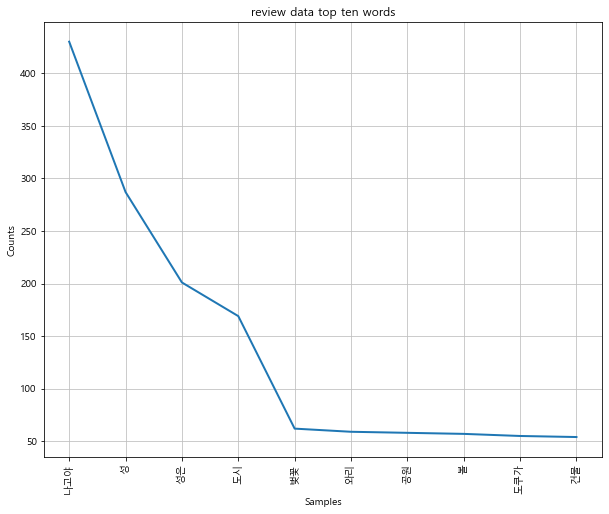

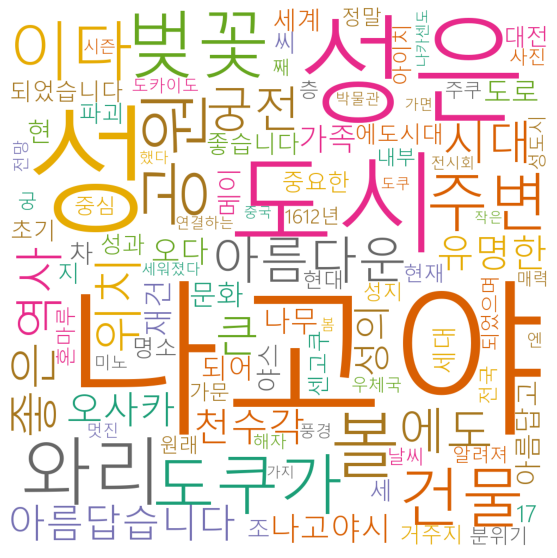

In [116]:
make_token('나고야성')

장소명: 지브리 미술관
전체 토큰 수: 22663


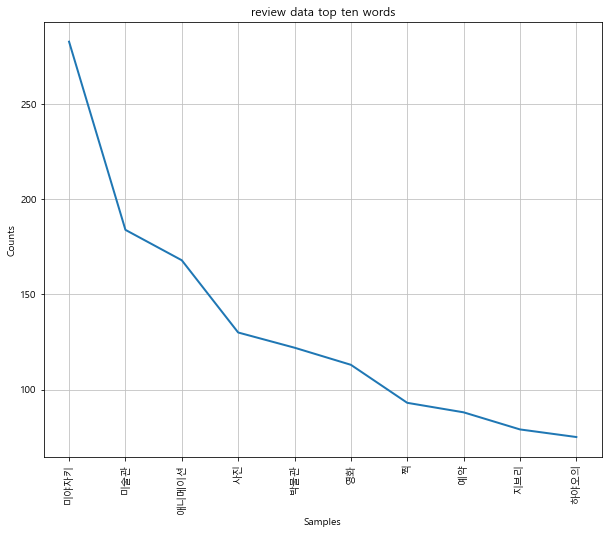

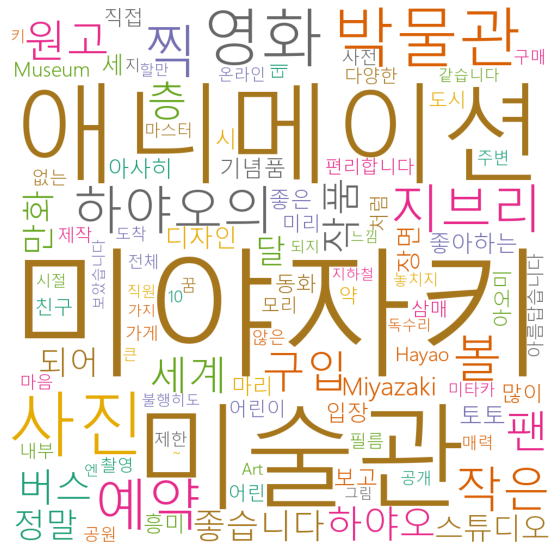

In [118]:
make_token("지브리 미술관")